Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Загрузка датасетов - данные по авиапассажиропотоку аэропортов России и данные по COVID19 в США

In [9]:
air = pd.read_csv('russian_passenger_air_service_2.csv')
air.head(5)
# air['Year'].unique()

,Airport name,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year,Airport coordinates
0,Abakan,2020,13495.0,14940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('91.399735'), Decimal('53.751351'))"
1,Aikhal,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
2,Loss,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
3,Amderma,2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
4,Anadyr (Carbon),2020,4255.0,4565.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [10]:
us = pd.read_csv('us-counties.csv')
us.head(5)

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


1

На этой столбчатой диаграмме мы видим ТОП 5 штатов США по смертности от COVID19. Несмотря на то, что абсолютное число заболевших и погибших в Нью-Йорке выше, чем в других штатах, по смертности он не на первом месте.


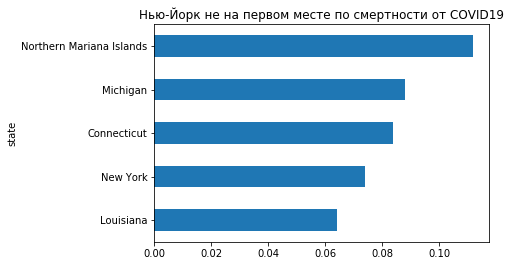

In [43]:
us_stat = us.groupby('state').sum()
us_stat['percentage'] = us_stat.deaths / us_stat.cases
us_stat_bar = us_stat.sort_values(by='percentage').iloc[-5:, 3]
us_stat_bar.plot(kind='barh',title='Нью-Йорк не на первом месте по смертности от COVID19')


In [142]:
air2 = air.rename(columns={'January':'01','February':'02','March':'03','April':'04','May':'05','June':'06','July':'07','August':'08','September':'09','October':'10','November':'11','December':'12'})

air3 = air2[air2['Year'] != 2020]
air3.head()

,Airport name,Year,01,02,03,04,05,06,07,08,09,10,11,12,Whole year,Airport coordinates
250,Abakan,2019,12571.0,11563.0,12427.0,13023.0,16641.0,22758.0,27883.0,27391.0,19478.0,16155.0,14745.0,89.8,209772.0,"(Decimal('91.399735'), Decimal('53.751351'))"
251,Aikhal,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('111.543324'), Decimal('65.957161'))"
252,Loss,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('125.398355'), Decimal('58.602489'))"
253,Amderma,2019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"(Decimal('61.577429'), Decimal('69.759076'))"
254,Anadyr (Carbon),2019,3785.0,3916.0,5061.0,7169.0,8601.0,10464.0,13569.0,13429.0,11190.0,8370.0,7144.0,199.0,102129.0,"(Decimal('177.738273'), Decimal('64.713433'))"


In [143]:
melted = air3.melt(id_vars=['Airport name','Year'],var_name='Month',value_name='Value')
melted['Value'] = pd.to_numeric(melted['Value'], errors='coerce')
# melted.info()
# melted.head()
melted1 = melted.iloc[:,2:]
melted1.head()

,Month,Value
0,01,12571.0
1,01,0.0
2,01,0.0
3,01,0.0
4,01,3785.0


2

На этом графике показана сезонность трафика Российских аэропортов с 2007 по 2019 года. 

Мы видим увеличение потока почти в 2 раза в сезон летних отпусков и резкое падение в декабре, что возможно связано с повышенными ценами на билеты, а также традицией встречать новый год дома, либо данные пропущены и некорректны.

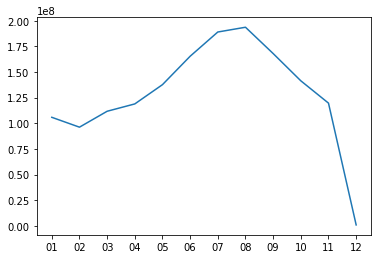

In [144]:
melted2 = melted1.groupby('Month').sum().reset_index().sort_values(by=['Month'], ascending=True).iloc[:-2,:]
melted2
plt.plot(melted2['Month'],melted2['Value'])
plt.show()

In [218]:
us.head(5)
us1 = us.groupby(['state','county']).sum().reset_index()
us2 = us1[(us1['cases'] > 950000) & (us1.state != 'New York')]
# us2.info()
us2

,state,county,fips,cases,deaths
202,California,Los Angeles,827069.0,2166527,95885
603,Illinois,Cook,2367309.0,3268804,145579
1209,Massachusetts,Middlesex,2451666.0,1030779,67477
1297,Michigan,Wayne,2433159.0,1171238,121994
1714,New Jersey,Bergen,3366297.0,1057289,78431
1721,New Jersey,Hudson,3197598.0,990153,55011
2222,Pennsylvania,Philadelphia,3915393.0,1074441,53538


3 

На следующем точечном графике видно, какие округи США (за исключением расположенных в штате Нью-Йорк как наиболее вероятных) могут стать следующим местом выспышки заболевания. 

Cook (Illinois) - 2ой по густонаселенности после Лос-Анжелеса
Wayne (Michigan) - центр округа - город Детройт с большим количеством проживающих афроамериканцев
Los Angeles (California) - самый густонаселенный округ США
Bergen (New Jersey) - самый густонаселенный округ штата Нью-Джерси, находится рядом с Нью-Йорком

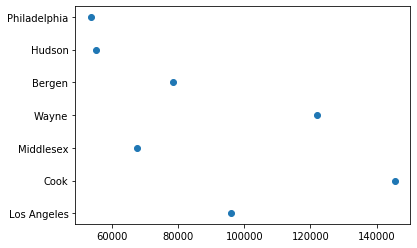

In [219]:
plt.scatter(us2.deaths, us2.county)

4

На этом графике я показываю ежедневную динамику диагностирования COVID-19 в США. 

Мы видим, что резкое увеличение количества заболевших началось в конце марта. Как увеличить график и подписи я не смогла разобраться :(

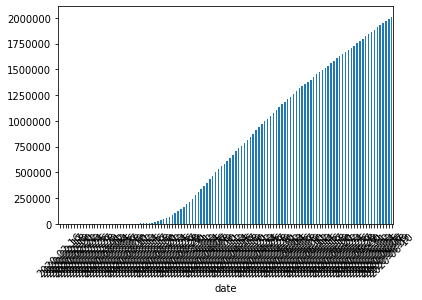

In [191]:
us0 = us[us['date'] > '2020-02-15']
us1 = us0.groupby('date')['cases'].sum()
us1.plot(kind='bar', rot = 45, stacked=True)

In [276]:
airports = ['Moscow (Sheremetyevo)','Moscow (Domodedovo)','Moscow (Vnukovo)','Saint Petersburg (Pulkovo)','Sochi','Novosibirsk (Tolmachyovo)','Ekaterinburg (Koltsovo)']
air1 = air[(air['Year'] == 2019) & (air['Whole year'] != 0) & (~air['Airport name'].isin(airports))].head(5)
# air1.head()
# air1.plot(kind='pie', y='Whole year')
# air2 = air1.groupby(['Airport name']).sum().sort_values(by='Whole year', ascending=False).head(5)
# air2 = air1[['Airport name','Whole year']].sort_values(by='Whole year', ascending=False).reset_index(drop=True).iloc[:5,:]
air2

,Year,January,February,March,April,May,June,July,August,September,October,November,December,Whole year
Airport name,,,,,,,,,,,,,,
Krasnodar (Paszkowski),2019,310912.0,269665.0,319319.0,360914.0,403364.0,425943.0,473843.0,489943.0,442423.0,410965.0,373861.0,639.68,4630770.0
Ufa,2019,236704.0,204548.0,245798.0,253361.0,322258.0,339687.0,366716.0,367994.0,339334.0,321862.0,275884.0,423.33,3556533.0
Vladivostok (Knevichi),2019,200824.0,192686.0,214262.0,216411.0,248751.0,276740.0,335918.0,365140.0,302346.0,283536.0,223592.0,2206.11,3079344.0
Samara (Kurumoch),2019,191566.0,172693.0,209237.0,213873.0,280316.0,295448.0,321047.0,318637.0,298567.0,270058.0,216584.0,306.81,2999252.0
Mineral water,2019,175830.0,155575.0,179483.0,191407.0,228967.0,228486.0,262486.0,268710.0,243432.0,233202.0,182557.0,161.39,2526419.0


5

На этом графике мы видим 5 самых популярных аэропортов России (за исключением Москвы, Санкт-Петербурга, Новосибирска и Екатеринбурга) и они загружены примерно ровно.

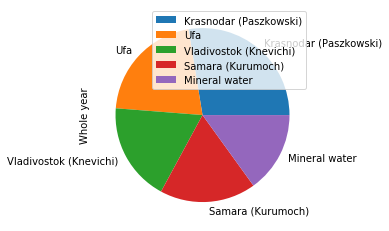

In [277]:
air2.plot(kind='pie', y='Whole year')